In [28]:
import pandas as pd
import numpy as np

# Visualización
import matplotlib.pyplot as plt
import seaborn as sns

# Ocultamos las advertencias para evitar mensajes innecesarios
import warnings
warnings.filterwarnings("ignore")

# Configuración
pd.set_option('display.max_columns', None)

In [29]:
df = pd.read_csv("spaces_hr_raw_data.csv")
df.head()

,Unnamed: 0,age,attrition,businesstravel,dailyrate,department,distancefromhome,education,educationfield,employeecount,employeenumber,environmentsatisfaction,gender,hourlyrate,jobinvolvement,joblevel,jobrole,jobsatisfaction,maritalstatus,monthlyincome,monthlyrate,numcompaniesworked,over18,overtime,percentsalaryhike,performancerating,relationshipsatisfaction,standardhours,stockoptionlevel,totalworkingyears,trainingtimeslastyear,worklifebalance,yearsatcompany,yearsincurrentrole,yearssincelastpromotion,yearswithcurrmanager,sameasmonthlyincome,datebirth,salary,roledepartament,numberchildren,remotework
0,0,51,No,NaN,2015.722222,NaN,6,3,NaN,1,1,1,0,NaN,3,5,resEArch DIREcToR,3,NaN,"16280,83$","42330,17$",7,Y,No,13,"3,0",3,Full Time,0,NaN,5,"3,0",20,NaN,15,15,"16280,83$",1972,"195370,00$",NaN,NaN,Yes
1,1,52,No,NaN,2063.388889,NaN,1,4,Life Sciences,1,2,3,0,NaN,2,5,ManAGeR,3,NaN,NaN,"43331,17$",0,NaN,NaN,14,"3,0",1,NaN,1,"34,0",5,"3,0",33,NaN,11,9,NaN,1971,"199990,00$",NaN,NaN,1
2,2,42,No,travel_rarely,1984.253968,Research & Development,4,2,Technical Degree,1,3,3,0,NaN,3,5,ManaGER,4,Married,NaN,"41669,33$",1,NaN,No,11,"3,0",4,NaN,0,"22,0",3,NaN,22,NaN,11,15,NaN,1981,"192320,00$",ManaGER - Research & Development,NaN,1
3,3,47,No,travel_rarely,1771.404762,NaN,2,4,Medical,1,4,1,1,NaN,3,4,ReseArCH DIrECtOr,3,Married,"14307,50$","37199,50$",3,Y,NaN,19,"3,0",2,Full Time,2,NaN,2,NaN,20,NaN,5,6,"14307,50$",1976,"171690,00$",NaN,NaN,False
4,4,46,No,NaN,1582.771346,NaN,3,3,Technical Degree,1,5,1,1,NaN,4,4,sAleS EXECUtIve,1,Divorced,"12783,92$","33238,20$",2,Y,No,12,"3,0",4,NaN,1,NaN,5,"3,0",19,NaN,2,8,"12783,92$",1977,NaN,NaN,NaN,0


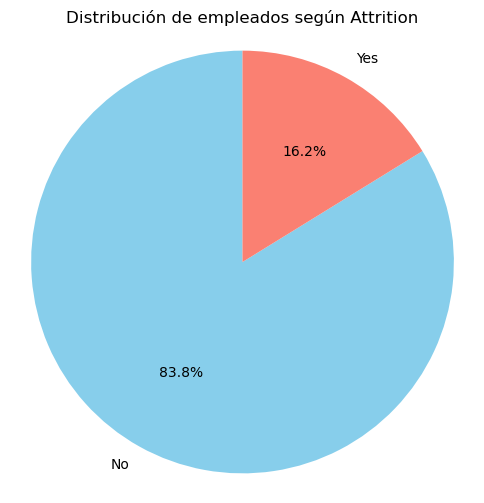

In [30]:
conteo = df['attrition'].value_counts()


plt.figure(figsize=(6, 6))
plt.pie(conteo, labels=conteo.index, autopct='%1.1f%%', startangle=90, colors=['skyblue', 'salmon'])
plt.title("Distribución de empleados según Attrition")
plt.axis('equal')  
plt.show()

In [31]:
num_vars = df.select_dtypes(include=np.number).columns.tolist()
correlation_matrix = df[num_vars].corr()

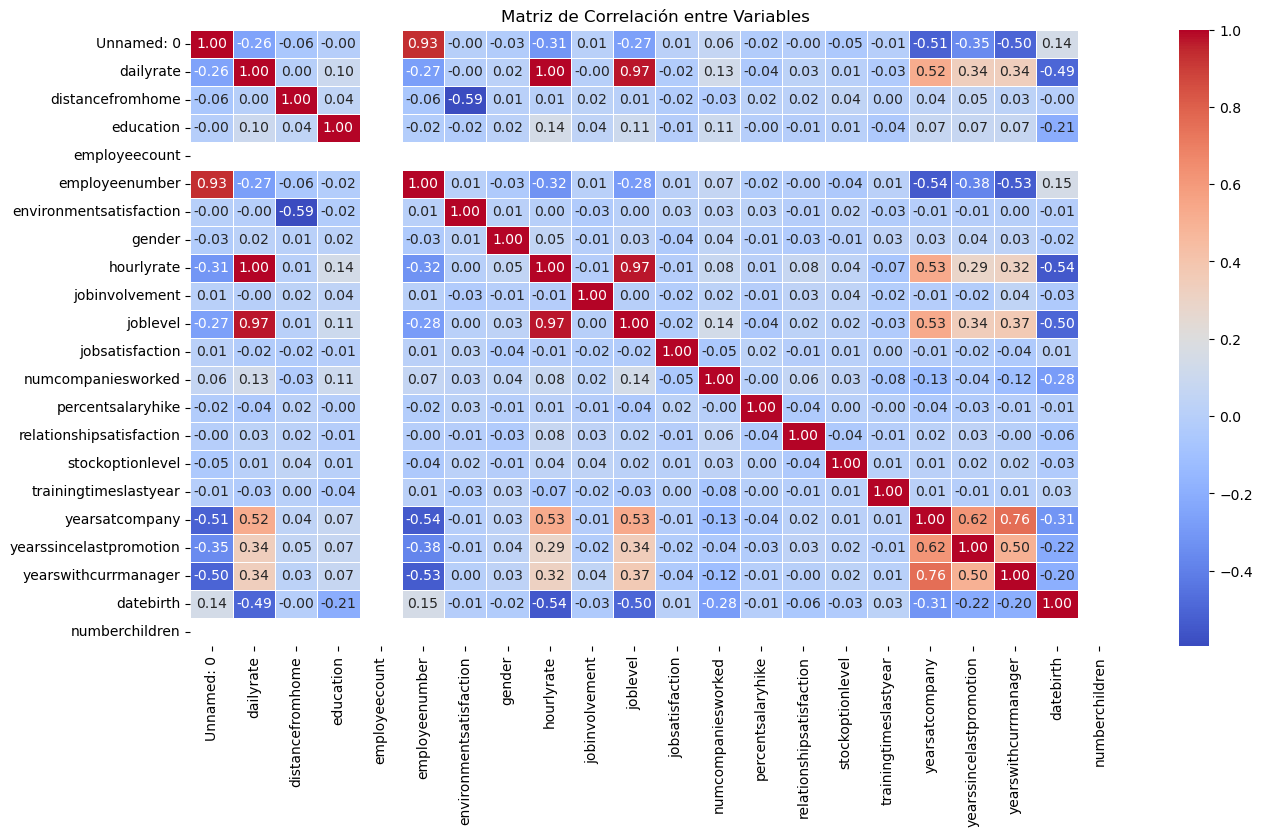

In [32]:
plt.figure(figsize=(15, 8))

sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt='.2f', linewidths=.5)

# Añade título
plt.title('Matriz de Correlación entre Variables')

# Muestra el gráfico

plt.show()

In [33]:
df['attrition'].describe()

count     1678
unique       2
top         No
freq      1406
Name: attrition, dtype: object

In [34]:
df['attrition'].isnull().sum()

0

In [35]:
crosstab_result = pd.crosstab(df['attrition'], df['jobsatisfaction'])

crosstab_result

jobsatisfaction,1,2,3,4
attrition,,,,
No,255,261,419,471
Yes,71,56,78,67


In [36]:
cross_tab_col_percent = pd.crosstab(df['attrition'], df['jobsatisfaction'], normalize='columns') * 100
print(cross_tab_col_percent)

jobsatisfaction          1          2          3          4
attrition                                                  
No               78.220859  82.334385  84.305835  87.546468
Yes              21.779141  17.665615  15.694165  12.453532


In [37]:
cross_tab_col_percent = pd.crosstab(df['attrition'], df['jobsatisfaction'], normalize='all') * 100
print(cross_tab_col_percent)

jobsatisfaction          1          2          3          4
attrition                                                  
No               15.196663  15.554231  24.970203  28.069130
Yes               4.231228   3.337306   4.648391   3.992849


In [38]:
cross_tab_col_percent = pd.crosstab(df['jobsatisfaction'], df['age'], normalize='columns') * 100
print(cross_tab_col_percent)

age                     18         19         20         21         22  \
jobsatisfaction                                                          
1                 0.000000  22.222222  27.272727  11.764706  11.764706   
2                11.111111  33.333333   9.090909  35.294118  17.647059   
3                55.555556  11.111111  36.363636  17.647059  29.411765   
4                33.333333  33.333333  27.272727  35.294118  41.176471   

age                     23         24         25         26         27  \
jobsatisfaction                                                          
1                33.333333  13.793103  25.000000  23.913043  22.222222   
2                 6.666667  20.689655  14.285714  10.869565  25.925926   
3                33.333333  44.827586  28.571429  28.260870  27.777778   
4                26.666667  20.689655  32.142857  36.956522  24.074074   

age                     28         29         30         31         32  \
jobsatisfaction                     

In [39]:
df.columns

Index(['Unnamed: 0', 'age', 'attrition', 'businesstravel', 'dailyrate',
       'department', 'distancefromhome', 'education', 'educationfield',
       'employeecount', 'employeenumber', 'environmentsatisfaction', 'gender',
       'hourlyrate', 'jobinvolvement', 'joblevel', 'jobrole',
       'jobsatisfaction', 'maritalstatus', 'monthlyincome', 'monthlyrate',
       'numcompaniesworked', 'over18', 'overtime', 'percentsalaryhike',
       'performancerating', 'relationshipsatisfaction', 'standardhours',
       'stockoptionlevel', 'totalworkingyears', 'trainingtimeslastyear',
       'worklifebalance', 'yearsatcompany', 'yearsincurrentrole',
       'yearssincelastpromotion', 'yearswithcurrmanager',
       'sameasmonthlyincome', 'datebirth', 'salary', 'roledepartament',
       'numberchildren', 'remotework'],
      dtype='object')

In [40]:
def categorizar_edad(edad):
    if edad < 30:
        return 'jovenes'
    elif 30 <= edad < 50:
        return 'mediana_edad'
    else:
        return 'senior'

In [41]:
df['age'] = pd.to_numeric(df['age'], errors='coerce')
df['grupo_edad'] = df['age'].apply(categorizar_edad)
df['Attrition_Edad'] = df['attrition'] + ' - ' + df['grupo_edad']

In [42]:
conteo = df.groupby(['grupo_edad', 'attrition']).size().reset_index(name='count')
conteo['percentage'] = conteo.groupby('grupo_edad')['count'].transform(lambda x: 100 * x / x.sum())


In [43]:
# no se ordena!!no se por qué
df['grupo_edad'] = pd.Categorical(df['grupo_edad'], categories=['jovenes', 'mediana_edad', 'senior'], ordered=True)
df_sorted = df.sort_values('grupo_edad')

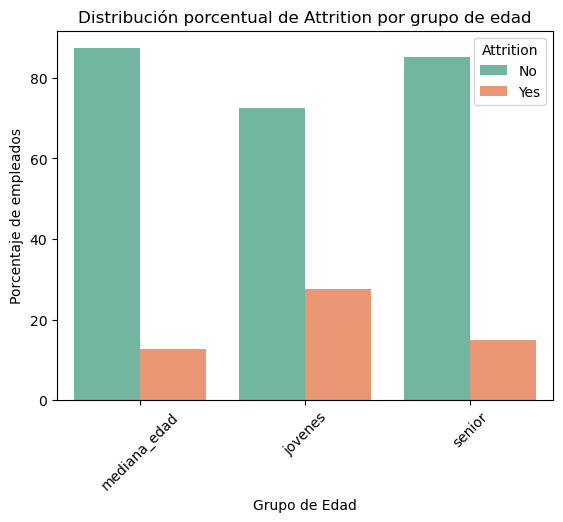

In [44]:

conteo = df.groupby(['grupo_edad', 'attrition']).size().reset_index(name='count')

conteo['percentage'] = conteo.groupby('grupo_edad')['count'].transform(lambda x: 100 * x / x.sum())

orden_edad = df['grupo_edad'].value_counts().index

sns.barplot(
    data=conteo,
    x='grupo_edad',
    y='percentage',
    hue='attrition',
    palette='Set2',
    order=orden_edad
)

plt.xticks(rotation=45)
plt.xlabel("Grupo de Edad")
plt.ylabel("Porcentaje de empleados")
plt.title("Distribución porcentual de Attrition por grupo de edad")
plt.legend(title="Attrition")
plt.show()


In [45]:
# test diferencias medias

<Axes: xlabel='attrition', ylabel='jobsatisfaction'>

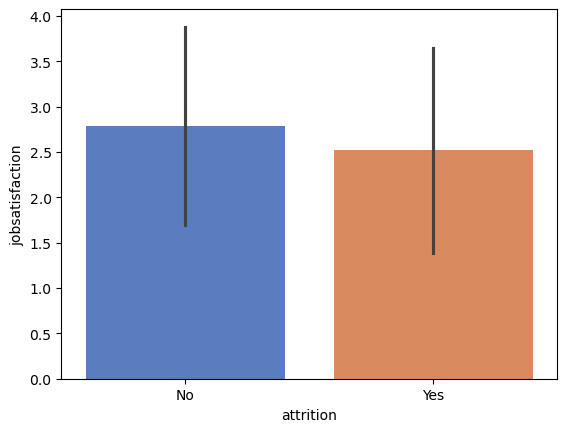

In [46]:
sns.barplot(x='attrition', y='jobsatisfaction',data=df, ci='sd', edgecolor= None, palette= 'muted')

In [47]:
df.dtypes

Unnamed: 0                     int64
age                          float64
attrition                     object
businesstravel                object
dailyrate                    float64
department                    object
distancefromhome               int64
education                      int64
educationfield                object
employeecount                  int64
employeenumber                 int64
environmentsatisfaction        int64
gender                         int64
hourlyrate                   float64
jobinvolvement                 int64
joblevel                       int64
jobrole                       object
jobsatisfaction                int64
maritalstatus                 object
monthlyincome                 object
monthlyrate                   object
numcompaniesworked             int64
over18                        object
overtime                      object
percentsalaryhike              int64
performancerating             object
relationshipsatisfaction       int64
s

In [48]:
df['maritalstatus'] = df['maritalstatus'].replace('Marreid', 'Married')
df['maritalstatus'] = df['maritalstatus'].replace('divorced', 'Divorced')

In [49]:
conteo = df.groupby(['maritalstatus', 'overtime']).size().reset_index(name='count')
conteo['percentage'] = conteo.groupby('maritalstatus')['count'].transform(lambda x: 100 * x / x.sum())
orden_marital = df['maritalstatus'].value_counts().index

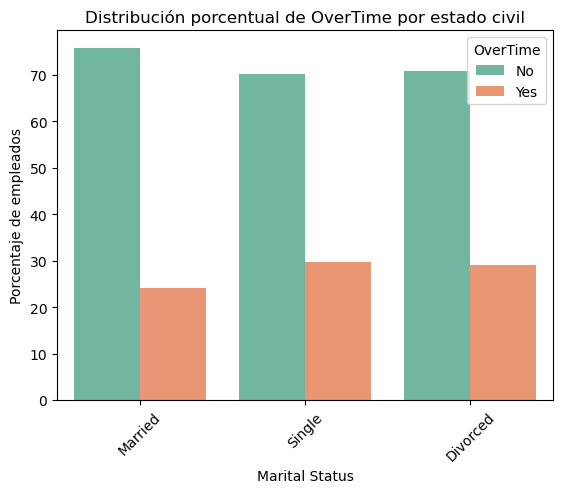

In [50]:

sns.barplot(
    data=conteo,
    x='maritalstatus',
    y='percentage',
    hue='overtime',
    palette='Set2',
    order=orden_marital
)

plt.xticks(rotation=45)
plt.xlabel("Marital Status")
plt.ylabel("Porcentaje de empleados")
plt.title("Distribución porcentual de OverTime por estado civil")
plt.legend(title="OverTime")
plt.show()


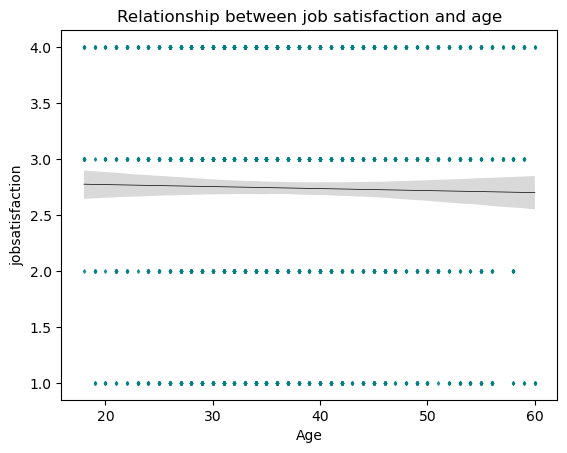

In [51]:
sns.regplot(x = "age", 
            y = "jobsatisfaction", 
            data = df, 
            marker = "d", 
            line_kws = {"color": "black", "linewidth": 0.5}, 
            scatter_kws = {"color": "teal", "s": 3} 
            )


plt.xlabel("Age")
plt.ylabel("jobsatisfaction")


plt.title("Relationship between job satisfaction and age")


plt.gca().spines['right'].set_visible(True) 
plt.gca().spines["top"].set_visible(True) 

In [52]:
#porcentaje= df['environmentsatisfaction'].value_counts(normalize=True) * 100


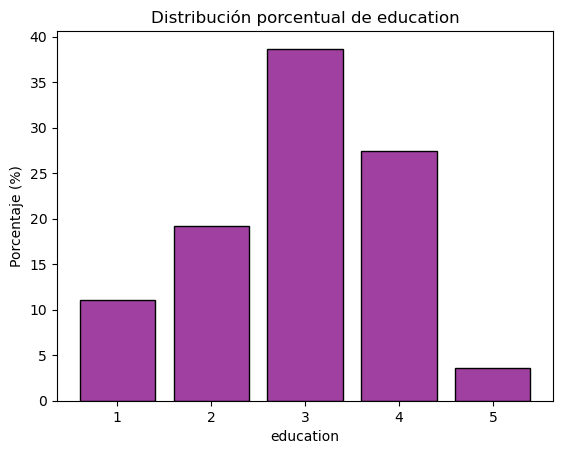

In [55]:
sns.histplot(
    data=df,
    x='education',
    stat='percent',         
    discrete=True,         
    shrink=0.8,             
    color='purple'
)

plt.ylabel('Porcentaje (%)')
plt.title('Distribución porcentual de education')
plt.show()